In [1]:
from keras.datasets import imdb
training_set, testing_set = imdb.load_data(num_words=10000)
X_train, y_train = training_set
X_test, y_test = testing_set

Since this is a dataset of sentences and text we will need to use word embeding. Keras' api can handle that for us.

In [2]:
print(len(X_train))
print(len(X_test))

25000
25000


In [3]:
from keras.preprocessing import sequence

In [4]:
X_train_padded = sequence.pad_sequences(X_train, maxlen = 100)
X_test_padded = sequence.pad_sequences(X_test, maxlen = 100)

In [5]:
from keras.models import Sequential

model = Sequential()

In [6]:
from keras.layers import Embedding

model.add(Embedding(input_dim = 10000, output_dim = 128))

In [7]:
from keras.layers import LSTM

model.add(LSTM(units=128))

In [8]:
from keras.layers import Dense

model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

In [31]:
scores = model.fit(x = X_train_padded, y = y_train, batch_size = 128, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
196/196 [==============================] - 56s 288ms/step - loss: 0.6924 - accuracy: 0.5303 - val_loss: 0.6924 - val_accuracy: 0.5427
Epoch 2/10
196/196 [==============================] - 58s 298ms/step - loss: 0.6923 - accuracy: 0.5382 - val_loss: 0.6923 - val_accuracy: 0.5446
Epoch 3/10
196/196 [==============================] - 86s 440ms/step - loss: 0.6922 - accuracy: 0.5380 - val_loss: 0.6923 - val_accuracy: 0.5470
Epoch 4/10
196/196 [==============================] - 91s 465ms/step - loss: 0.6922 - accuracy: 0.5464 - val_loss: 0.6922 - val_accuracy: 0.5471
Epoch 5/10
196/196 [==============================] - 62s 315ms/step - loss: 0.6921 - accuracy: 0.5491 - val_loss: 0.6921 - val_accuracy: 0.5450
Epoch 6/10
196/196 [==============================] - 60s 304ms/step - loss: 0.6920 - accuracy: 0.5492 - val_loss: 0.6920 - val_accuracy: 0.5523
Epoch 7/10
196/196 [==============================] - 59s 303ms/step - loss: 0.6919 - accuracy: 0.5521 - val_loss: 0.6920 - val_ac

In [14]:
def train_model(Optimizer, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Embedding(input_dim = 10000, output_dim = 128))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
    scores = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))
    return scores, model

In [15]:
RMSprop_score, RMSprop_model = train_model(Optimizer = 'RMSprop', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)
Adam_score, Adam_model = train_model(Optimizer = 'adam', X_train= X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

Epoch 1/10
196/196 [==============================] - 57s 292ms/step - loss: 0.4661 - accuracy: 0.7823 - val_loss: 0.4103 - val_accuracy: 0.8261
Epoch 2/10
196/196 [==============================] - 59s 299ms/step - loss: 0.3036 - accuracy: 0.8751 - val_loss: 0.3745 - val_accuracy: 0.8379
Epoch 3/10
196/196 [==============================] - 58s 298ms/step - loss: 0.2559 - accuracy: 0.8975 - val_loss: 0.4926 - val_accuracy: 0.7852
Epoch 4/10
196/196 [==============================] - 59s 299ms/step - loss: 0.2176 - accuracy: 0.9151 - val_loss: 0.3869 - val_accuracy: 0.8514
Epoch 5/10
196/196 [==============================] - 69s 350ms/step - loss: 0.1893 - accuracy: 0.9290 - val_loss: 0.4745 - val_accuracy: 0.8393
Epoch 6/10
196/196 [==============================] - 73s 374ms/step - loss: 0.1653 - accuracy: 0.9396 - val_loss: 0.3987 - val_accuracy: 0.8427
Epoch 7/10
196/196 [==============================] - 65s 333ms/step - loss: 0.1385 - accuracy: 0.9490 - val_loss: 0.4801 - val_ac

In [22]:
from matplotlib import pyplot as plt

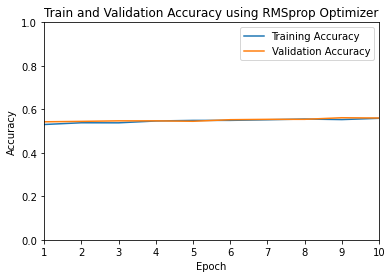

In [32]:
plt.plot(range(1,11), scores.history['accuracy'], label='Training Accuracy') 
plt.plot(range(1,11), scores.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

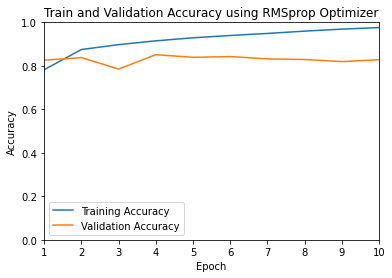

In [25]:
plt.plot(range(1,11), RMSprop_score.history['accuracy'], label='Training Accuracy') 
plt.plot(range(1,11), RMSprop_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

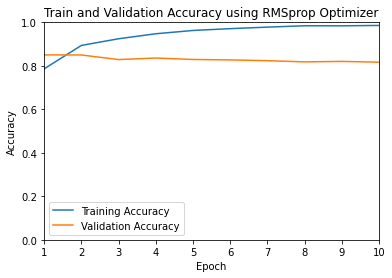

In [29]:
plt.plot(range(1,11), Adam_score.history['accuracy'], label='Training Accuracy') 
plt.plot(range(1,11), Adam_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

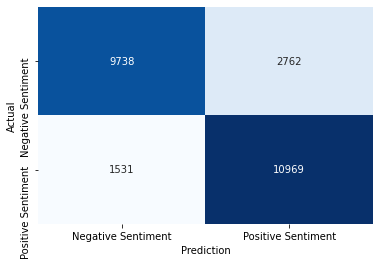

In [38]:
y_test_pred = RMSprop_model.predict_classes(X_test_padded) 
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 'Positive Sentiment'], yticklabels=['Negative Sentiment', 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

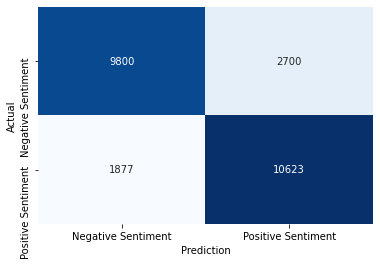

In [39]:
y_test_pred = Adam_model.predict_classes(X_test_padded) 
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 'Positive Sentiment'], yticklabels=['Negative Sentiment', 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()